In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import AdaBoostRegressor

## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')

In [3]:
df_pen = df_pen.dropna()

In [4]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [5]:
X = df_pen.drop(['body_mass_g'], axis = 1)
y = df_pen['body_mass_g']

## Data Pre-processing

In [6]:
categorical_x = ['species', 'island', 'sex']
numerical_x = X.drop(categorical_x, axis = 1).columns

In [7]:
# ## If y is categorical:
# # y.fillna(y.mode(), inplace= True)
# ##If y is numerical
# y.fillna(y.mean(), inplace= True)
# for i in numerical_x:
#     X[i].fillna(X[i].mean(), inplace = True)

# for i in categorical_x:
#     X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [9]:
# escalador = StandardScaler()
# escalador.fit(X_train)

# X_train = escalador.transform(X_train)
# X_test = escalador.transform(X_test)

## Model implementation

In [10]:
model = AdaBoostRegressor()

In [11]:
model.fit(X_train,y_train)

AdaBoostRegressor()

In [12]:
base_preds = model.predict(X_test)

## Evaluation

In [13]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, base_preds)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, base_preds)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, base_preds))}')

Mean Absolute Error: 219.299912754839
Mean Squared Error: 77098.60596881686
Root Mean Squared Error: 277.6663572866127


In [14]:
model.feature_importances_

array([0.00219112, 0.32832133, 0.00132293, 0.00139795, 0.09621127,
       0.06003415, 0.06622659, 0.44429465])

In [15]:
df_feature_importance = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])
df_feature_importance = df_feature_importance.sort_values('Feature Importance', ascending = False)
df_feature_importance

,Feature Importance
flipper_length_mm,0.444295
species_Gentoo,0.328321
sex_Male,0.096211
bill_depth_mm,0.066227
bill_length_mm,0.060034
species_Chinstrap,0.002191
island_Torgersen,0.001398
island_Dream,0.001323


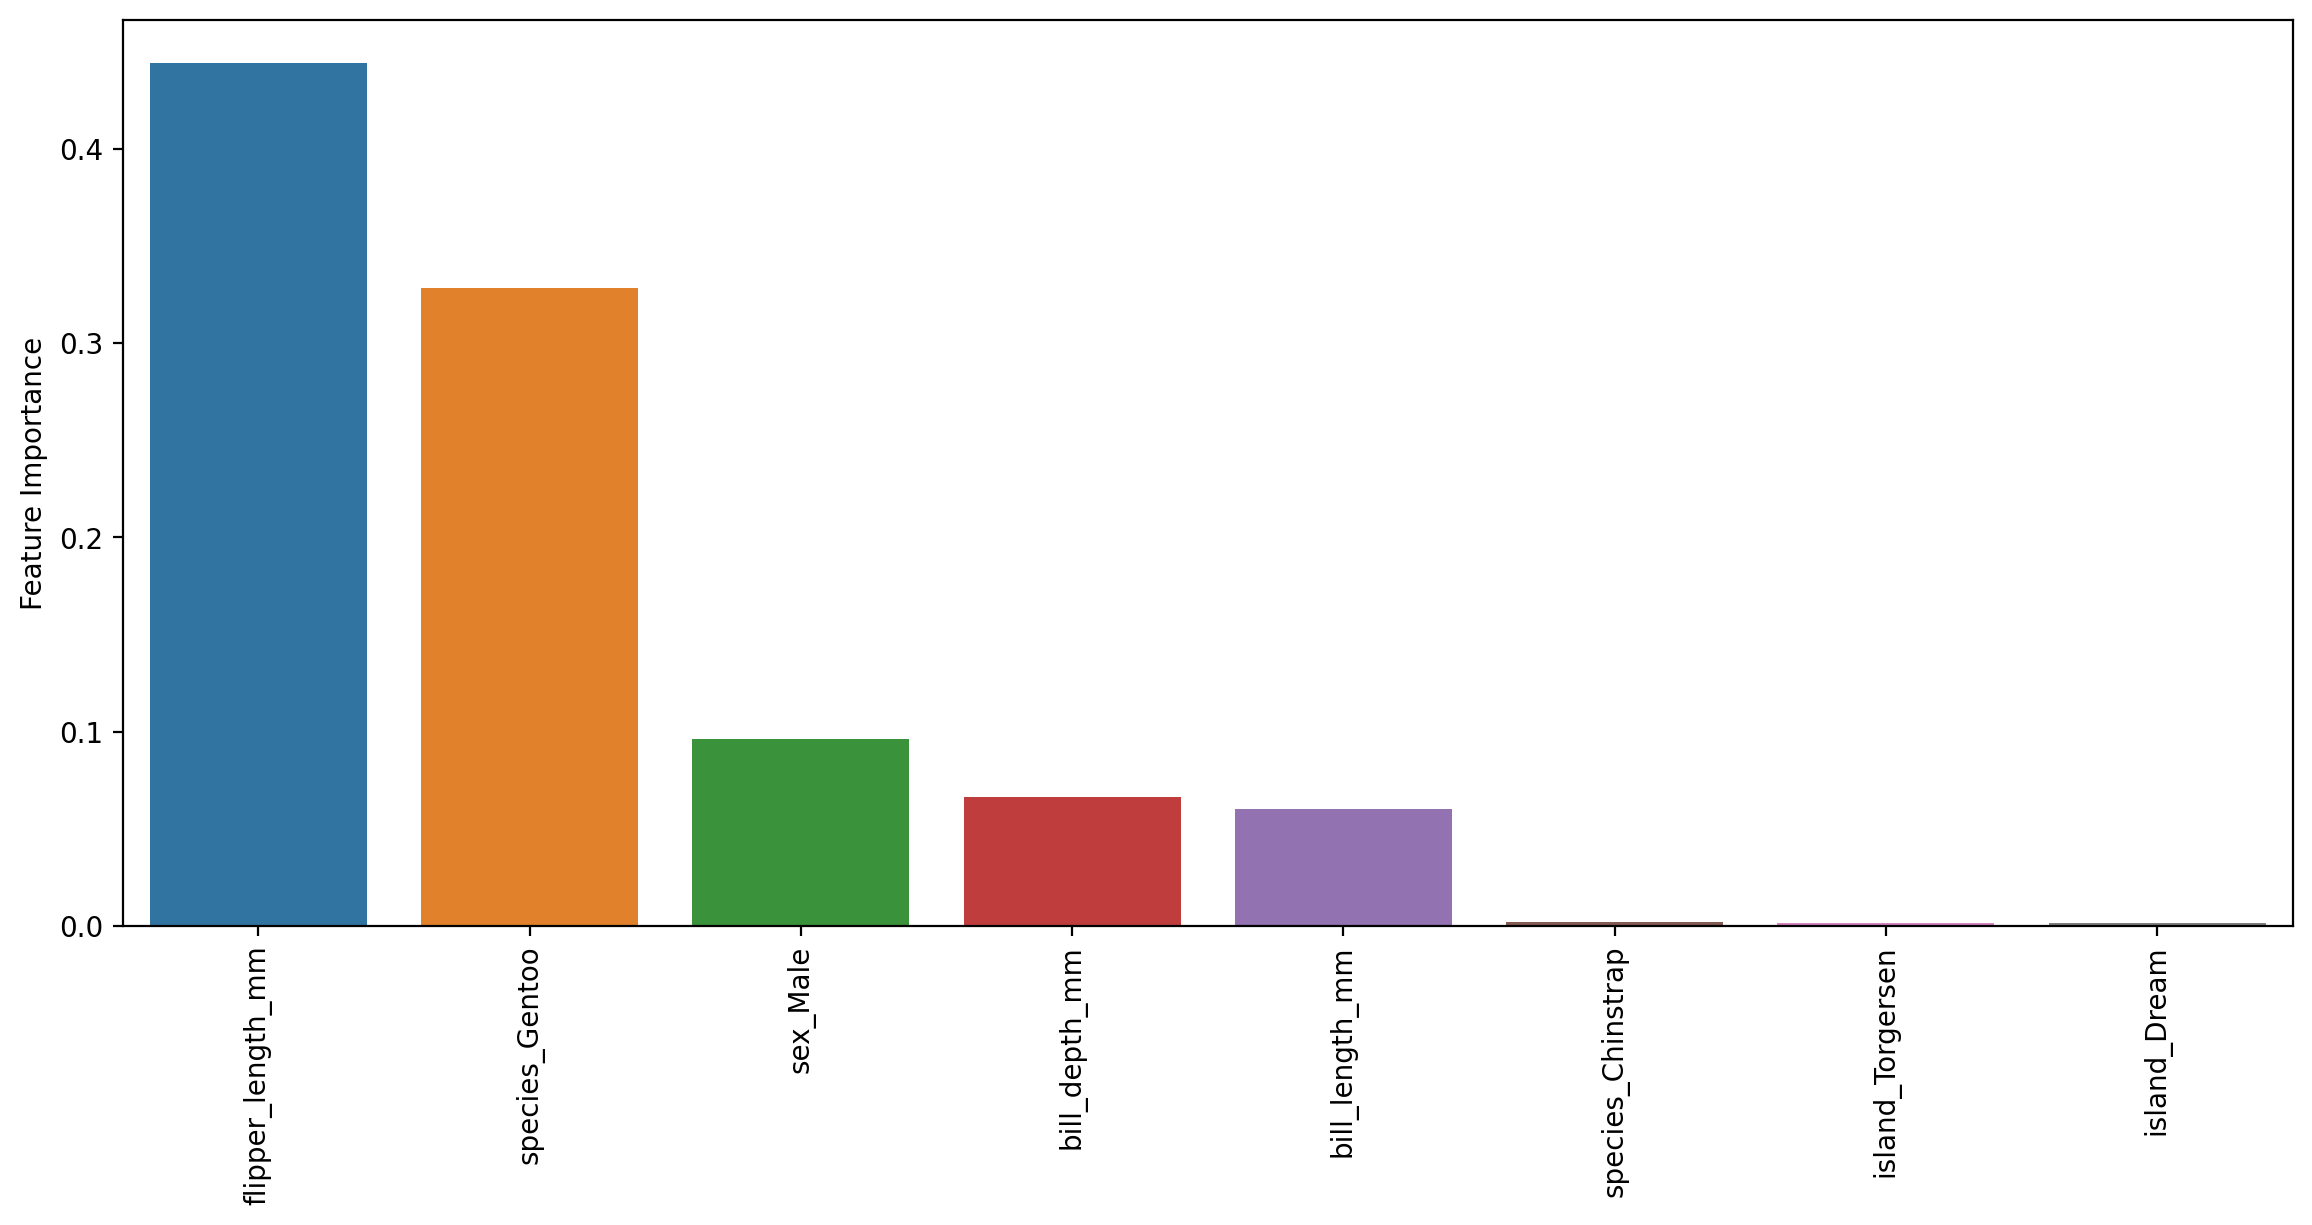

In [16]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df_feature_importance,x=df_feature_importance.index,y='Feature Importance')
plt.xticks(rotation=90);

## Grid Search

In [17]:
model = AdaBoostRegressor()

In [18]:
n_estimators = [15,20,25,30,35]
learning_rate = [1]
loss = ['linear', 'square', 'exponential']

parametros = {'n_estimators':n_estimators,
              'learning_rate':learning_rate,
              'loss': loss}

In [19]:
grid_model = GridSearchCV(model,param_grid= parametros, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1)

In [20]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [15, 20, 25, 30, 35]},
             scoring='neg_mean_squared_error')

In [21]:
grid_model.best_params_

{'learning_rate': 1, 'loss': 'linear', 'n_estimators': 35}

In [22]:
y_pred = grid_model.predict(X_test)

### Evaluation

In [23]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

Mean Absolute Error: 228.2919252855722
Mean Squared Error: 81732.39927910981
Root Mean Squared Error: 285.8887883060646


In [24]:
grid_model.best_estimator_.feature_importances_

array([0.        , 0.43451606, 0.00071026, 0.        , 0.12877714,
       0.02397347, 0.03545509, 0.37656798])

In [25]:
df_feature_importance = pd.DataFrame(index=X.columns,data=grid_model.best_estimator_.feature_importances_,columns=['Feature Importance'])
df_feature_importance = df_feature_importance.sort_values('Feature Importance', ascending = False)
df_feature_importance

,Feature Importance
species_Gentoo,0.434516
flipper_length_mm,0.376568
sex_Male,0.128777
bill_depth_mm,0.035455
bill_length_mm,0.023973
island_Dream,0.000710
species_Chinstrap,0.000000
island_Torgersen,0.000000


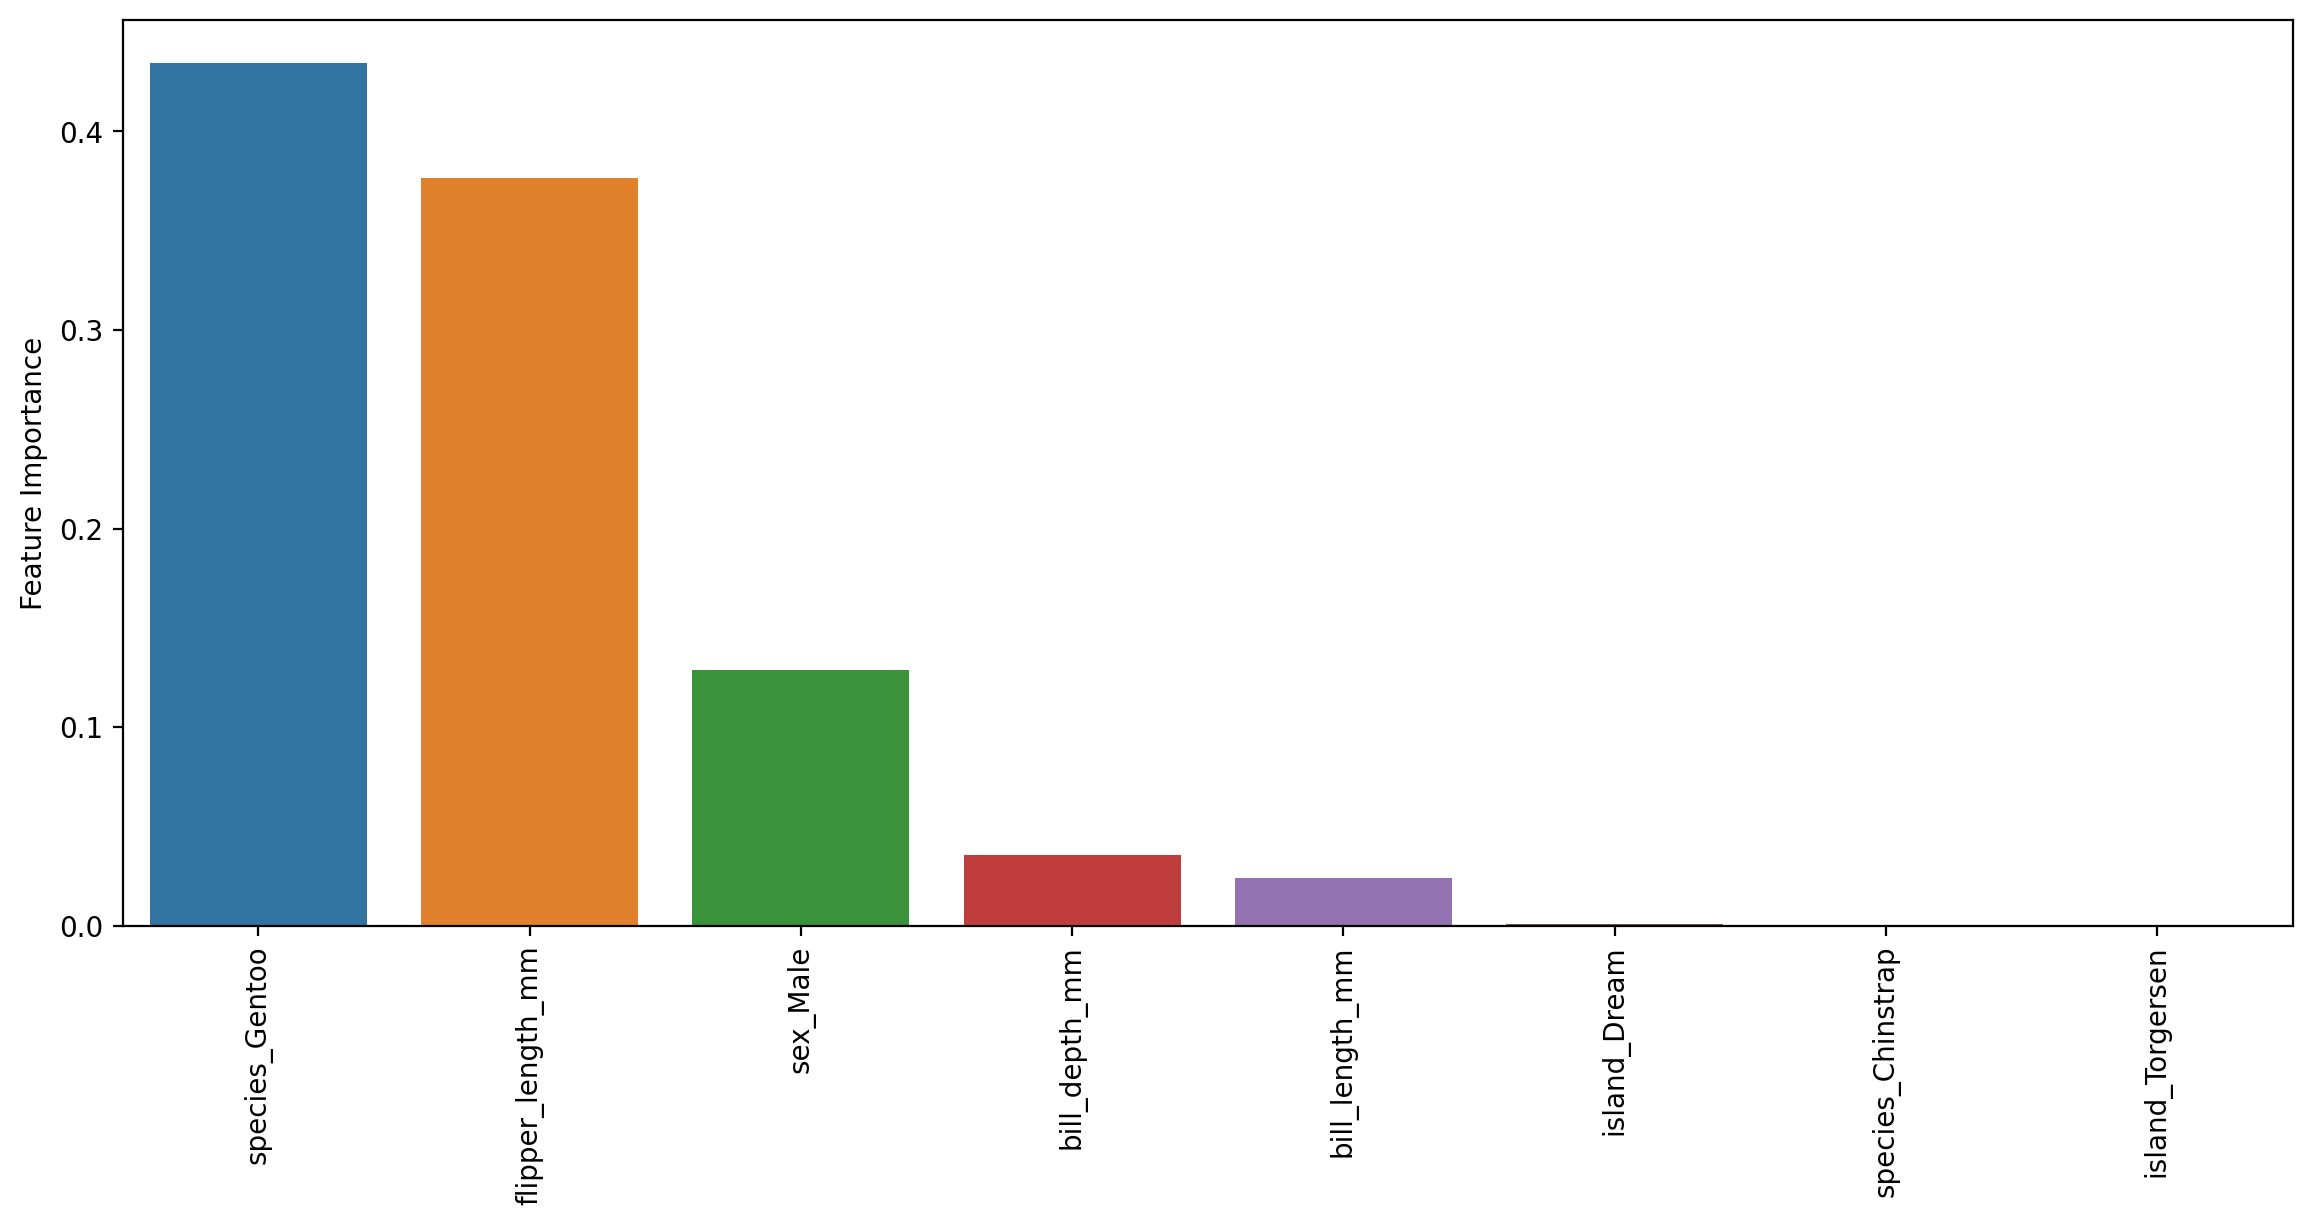

In [26]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df_feature_importance,x=df_feature_importance.index,y='Feature Importance')
plt.xticks(rotation=90);

## Elbow

In [27]:
errors = []

for n in range(1,128):
    rfc = AdaBoostRegressor( n_estimators=n)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = metrics.mean_squared_error(preds,y_test)
    errors.append(err)

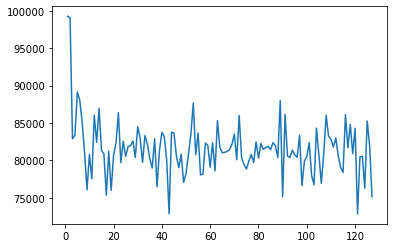

In [28]:
plt.plot(range(1,128),errors)